# Introduction to Python: Pandas

In [405]:
import pandas as pd

## Reading CSV File

In [406]:
CSV_IN_FILE = '../inFiles/randomuser5000.csv'

In [407]:
# view the documentation for a function or method
pd.read_csv?
# pd.read_csv??
# pd.read_csv(      Shift + Tab

In [408]:
# read data from a CSV file into a DataFrame
df = pd.read_csv(CSV_IN_FILE)
df.shape

(5000, 25)

## Reading JSON File

In [409]:
JSON_IN_FILE = '../inFiles/flights.json'

In [410]:
# read non-nested data from a JSON file into a DataFrame
df = pd.read_json(JSON_IN_FILE)
df.shape

(336776, 19)

In [411]:
JSON_IN_FILE_NESTED = '../inFiles/randomuser5000.json'

In [412]:
import json
from pandas.io.json import json_normalize

In [413]:
# read nested data from a JSON file into a DataFrame
with open(JSON_IN_FILE_NESTED, 'r', newline='') as in_file:  
    data = json.load(in_file)
    records = data['results']
    df = json_normalize(records)
df.shape

(5000, 25)

## Reading Excel File

In [414]:
EXCEL_IN_FILE = '../inFiles/randomuser5000.xlsx'

In [415]:
# read data from an Excel worksheet into a DataFrame
df = pd.read_excel(EXCEL_IN_FILE, sheet_name='randomuser5000_all')
df.shape

(5000, 25)

## Viewing Data

In [416]:
# view info about columns, including names, counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
gender               5000 non-null object
name.title           5000 non-null object
name.first           5000 non-null object
name.last            5000 non-null object
location.street      5000 non-null object
location.city        5000 non-null object
location.state       5000 non-null object
location.postcode    5000 non-null int64
email                5000 non-null object
login.username       5000 non-null object
login.password       5000 non-null object
login.salt           5000 non-null object
login.md5            5000 non-null object
login.sha1           5000 non-null object
login.sha256         5000 non-null object
dob                  5000 non-null datetime64[ns]
registered           5000 non-null datetime64[ns]
phone                5000 non-null object
cell                 5000 non-null object
id.name              5000 non-null object
id.value             5000 non-null obj

In [417]:
# view first few rows of data
df.head()

,gender,name.title,name.first,name.last,location.street,location.city,location.state,location.postcode,email,login.username,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,female,ms,scarlett,hanson,5689 w gray st,shreveport,hawaii,33733,scarlett.hanson@example.com,silverduck580,...,1951-10-28 16:10:22,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,female,ms,alicia,west,4863 bruce st,miramar,rhode island,34093,alicia.west@example.com,goldenwolf645,...,1962-08-09 23:52:13,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2,male,mr,daniel,mcdonalid,5071 miller ave,spokane,west virginia,72244,daniel.mcdonalid@example.com,purplefrog645,...,1950-04-16 19:37:36,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,male,mr,joseph,mccoy,4529 w dallas st,irvine,tennessee,27143,joseph.mccoy@example.com,whitelion627,...,1946-02-14 17:33:17,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
4,male,mr,erik,castro,7027 crockett st,oakland,indiana,69877,erik.castro@example.com,whitepeacock129,...,1947-02-16 21:39:33,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US


In [418]:
# view last few rows of data
df.tail()

,gender,name.title,name.first,name.last,location.street,location.city,location.state,location.postcode,email,login.username,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
4995,female,ms,charlene,warren,7848 groveland terrace,woodbridge,texas,34309,charlene.warren@example.com,crazysnake849,...,1987-02-14 18:07:03,2002-10-19 17:33:54,(964)-405-7014,(618)-769-6646,SSN,326-71-9235,https://randomuser.me/api/portraits/women/58.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
4996,male,mr,vernon,payne,7342 robinson rd,yonkers,indiana,87922,vernon.payne@example.com,silvermeercat303,...,1958-10-16 08:18:04,2006-05-17 01:20:22,(849)-893-2457,(362)-114-7766,SSN,424-97-0636,https://randomuser.me/api/portraits/men/98.jpg,https://randomuser.me/api/portraits/med/men/98...,https://randomuser.me/api/portraits/thumb/men/...,US
4997,female,ms,sue,garrett,6834 w dallas st,waterbury,arkansas,26422,sue.garrett@example.com,silversnake900,...,1946-08-16 08:15:34,2011-12-09 09:48:35,(982)-872-4627,(607)-862-4859,SSN,721-58-1697,https://randomuser.me/api/portraits/women/89.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
4998,male,mr,lee,bell,2942 w campbell ave,portland,kentucky,59730,lee.bell@example.com,browncat848,...,1990-04-01 12:18:01,2013-06-20 07:44:08,(553)-697-7618,(079)-417-2647,SSN,017-77-4523,https://randomuser.me/api/portraits/men/35.jpg,https://randomuser.me/api/portraits/med/men/35...,https://randomuser.me/api/portraits/thumb/men/...,US
4999,male,mr,gilbert,garrett,6237 oak lawn ave,orlando,oklahoma,93011,gilbert.garrett@example.com,reddog292,...,1955-10-22 18:29:01,2006-12-26 13:32:24,(271)-021-6817,(347)-772-4201,SSN,522-85-1473,https://randomuser.me/api/portraits/men/84.jpg,https://randomuser.me/api/portraits/med/men/84...,https://randomuser.me/api/portraits/thumb/men/...,US


In [419]:
# view DataFrame's index
df.index

RangeIndex(start=0, stop=5000, step=1)

In [420]:
# view column names
df.columns

Index(['gender', 'name.title', 'name.first', 'name.last', 'location.street',
       'location.city', 'location.state', 'location.postcode', 'email',
       'login.username', 'login.password', 'login.salt', 'login.md5',
       'login.sha1', 'login.sha256', 'dob', 'registered', 'phone', 'cell',
       'id.name', 'id.value', 'picture.large', 'picture.medium',
       'picture.thumbnail', 'nat'],
      dtype='object')

## Selecting Data

### By Index Position

In [421]:
# select rows by index position
df.iloc[0:4,:]

,gender,name.title,name.first,name.last,location.street,location.city,location.state,location.postcode,email,login.username,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,female,ms,scarlett,hanson,5689 w gray st,shreveport,hawaii,33733,scarlett.hanson@example.com,silverduck580,...,1951-10-28 16:10:22,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,female,ms,alicia,west,4863 bruce st,miramar,rhode island,34093,alicia.west@example.com,goldenwolf645,...,1962-08-09 23:52:13,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2,male,mr,daniel,mcdonalid,5071 miller ave,spokane,west virginia,72244,daniel.mcdonalid@example.com,purplefrog645,...,1950-04-16 19:37:36,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,male,mr,joseph,mccoy,4529 w dallas st,irvine,tennessee,27143,joseph.mccoy@example.com,whitelion627,...,1946-02-14 17:33:17,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US


In [422]:
# select columns by index position
df.iloc[:,[5,6]].head()

,location.city,location.state
0,shreveport,hawaii
1,miramar,rhode island
2,spokane,west virginia
3,irvine,tennessee
4,oakland,indiana


In [423]:
# select rows and columns by index position
df.iloc[[0,1],[5,6]]

,location.city,location.state
0,shreveport,hawaii
1,miramar,rhode island


### By Label

In [424]:
# select columns by label
df.loc[:,['location.city', 'location.state']].head()

,location.city,location.state
0,shreveport,hawaii
1,miramar,rhode island
2,spokane,west virginia
3,irvine,tennessee
4,oakland,indiana


#### Set Index

In [425]:
# set location.state as index so we can select rows by label
df.set_index('location.state', inplace=True, drop=True)
df.head()

,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,login.username,login.password,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
location.state,,,,,,,,,,,,,,,,,,,,,
hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,silverduck580,jiang,...,1951-10-28 16:10:22,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,goldenwolf645,braves,...,1962-08-09 23:52:13,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,purplefrog645,castro,...,1950-04-16 19:37:36,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,whitelion627,louise,...,1946-02-14 17:33:17,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
indiana,male,mr,erik,castro,7027 crockett st,oakland,69877,erik.castro@example.com,whitepeacock129,miranda,...,1947-02-16 21:39:33,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US


#### Select Rows by Index Label

In [426]:
# select rows by index label
df.loc['california',:]

,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,login.username,login.password,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
location.state,,,,,,,,,,,,,,,,,,,,,
california,male,mr,maurice,terry,3876 pecan acres ln,aurora,56753,maurice.terry@example.com,organicmouse503,storm,...,1994-08-02 06:50:54,2004-07-31 13:26:37,(896)-912-8712,(820)-686-1230,SSN,747-57-4492,https://randomuser.me/api/portraits/men/82.jpg,https://randomuser.me/api/portraits/med/men/82...,https://randomuser.me/api/portraits/thumb/men/...,US
california,male,mr,ronald,jackson,4561 lone wolf trail,thousand oaks,99027,ronald.jackson@example.com,beautifulwolf977,fergus,...,1986-06-28 22:42:53,2009-07-10 19:08:31,(719)-361-2018,(996)-949-6498,SSN,607-73-2647,https://randomuser.me/api/portraits/men/26.jpg,https://randomuser.me/api/portraits/med/men/26...,https://randomuser.me/api/portraits/thumb/men/...,US
california,male,mr,ben,gardner,2438 e center st,providence,41784,ben.gardner@example.com,yellowpeacock366,rebecca1,...,1984-10-26 11:15:03,2005-06-28 05:47:59,(227)-726-4016,(210)-336-9839,SSN,762-09-9702,https://randomuser.me/api/portraits/men/74.jpg,https://randomuser.me/api/portraits/med/men/74...,https://randomuser.me/api/portraits/thumb/men/...,US
california,male,mr,caleb,morrison,4670 groveland terrace,pomona,71777,caleb.morrison@example.com,redbear622,happy2,...,1995-06-10 10:24:26,2013-06-05 16:29:54,(562)-196-9503,(298)-715-7322,SSN,039-83-7473,https://randomuser.me/api/portraits/men/31.jpg,https://randomuser.me/api/portraits/med/men/31...,https://randomuser.me/api/portraits/thumb/men/...,US
california,male,mr,eric,harris,8280 cackson st,flint,94943,eric.harris@example.com,crazyfrog693,kkkkkkkk,...,1992-01-09 10:56:31,2007-05-22 08:35:29,(466)-774-0193,(897)-695-3072,SSN,529-92-3341,https://randomuser.me/api/portraits/men/42.jpg,https://randomuser.me/api/portraits/med/men/42...,https://randomuser.me/api/portraits/thumb/men/...,US
california,female,mrs,emma,thomas,8572 dogwood ave,boston,64259,emma.thomas@example.com,tinykoala517,iceman1,...,1979-04-23 23:04:01,2014-05-19 02:18:20,(065)-102-3020,(107)-464-1204,SSN,264-99-0402,https://randomuser.me/api/portraits/women/71.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
california,male,mr,hunter,bates,5903 preston rd,albany,91329,hunter.bates@example.com,ticklishcat265,smokey,...,1952-03-06 01:39:17,2012-01-25 12:33:58,(793)-103-1396,(501)-410-9337,SSN,435-82-3464,https://randomuser.me/api/portraits/men/14.jpg,https://randomuser.me/api/portraits/med/men/14...,https://randomuser.me/api/portraits/thumb/men/...,US
california,female,ms,annie,daniels,3683 walnut hill ln,sioux falls,10967,annie.daniels@example.com,bluemeercat713,brenda,...,1969-04-10 21:05:46,2007-07-04 18:50:50,(469)-224-0071,(320)-146-7401,SSN,624-89-1368,https://randomuser.me/api/portraits/women/11.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
california,female,mrs,minnie,hall,7772 groveland terrace,sioux falls,45553,minnie.hall@example.com,lazygoose540,ghost1,...,1945-03-16 16:01:19,2006-11-13 09:26:57,(888)-172-8197,(040)-747-3446,SSN,302-79-1347,https://randomuser.me/api/portraits/women/15.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US


In [427]:
# select rows and columns by label
df.loc[['maryland', 'virginia'],['name.first', 'name.last', 'location.city']]

,name.first,name.last,location.city
location.state,,,
maryland,wade,elliott,saint paul
maryland,carrie,duncan,bozeman
maryland,erika,anderson,yakima
maryland,dave,jacobs,peoria
maryland,steven,hunter,farmers branch
maryland,eleanor,cole,eugene
maryland,erin,vargas,richmond
maryland,stanley,bennett,amarillo
maryland,billie,kuhn,chattanooga


#### Reset Index

In [428]:
# reset the index
df.reset_index(inplace=True)
df.head()

,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,login.username,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,silverduck580,...,1951-10-28 16:10:22,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,goldenwolf645,...,1962-08-09 23:52:13,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2,west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,purplefrog645,...,1950-04-16 19:37:36,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,whitelion627,...,1946-02-14 17:33:17,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
4,indiana,male,mr,erik,castro,7027 crockett st,oakland,69877,erik.castro@example.com,whitepeacock129,...,1947-02-16 21:39:33,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US


#### Set DatetimeIndex

In [429]:
# set column 'dob' as index 
df.set_index(pd.DatetimeIndex(df['dob']), inplace=True)
df.drop(['dob'], axis=1, inplace=True)
df.head()

,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,login.username,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
dob,,,,,,,,,,,,,,,,,,,,,
1951-10-28 16:10:22,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,silverduck580,...,6e2e46961fae3be9756b36e701f46d890216b5bf05ce04...,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1962-08-09 23:52:13,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,goldenwolf645,...,7397c3d03ccedc1ecbec97b1e2de9af4d4fcf1fc006a1a...,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1950-04-16 19:37:36,west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,purplefrog645,...,b25b02c749a1daca841615e1845d3840ff895c129d4a1a...,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
1946-02-14 17:33:17,tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,whitelion627,...,51dc19032cc7c9afa67f10556b6f1c51ed613bdf972d6c...,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
1947-02-16 21:39:33,indiana,male,mr,erik,castro,7027 crockett st,oakland,69877,erik.castro@example.com,whitepeacock129,...,0efecf25466c2896a24d240eb504494873cd4f48870240...,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US


#### Select Rows by DatetimeIndex

In [430]:
# select rows and columns based on datetime index
df.loc['1980-10',['name.first', 'name.last', 'location.state']]

,name.first,name.last,location.state
dob,,,
1980-10-16 15:42:10,frederick,gregory,delaware
1980-10-04 04:37:21,melvin,burton,maryland
1980-10-24 04:23:21,allison,flores,tennessee
1980-10-08 11:19:06,darren,rogers,iowa
1980-10-02 14:34:14,ramon,day,ohio
1980-10-13 14:58:11,robin,simmons,washington


#### Reset Index

In [431]:
# reset the index
df.reset_index(inplace=True)
df.head()

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,1951-10-28 16:10:22,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,...,6e2e46961fae3be9756b36e701f46d890216b5bf05ce04...,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,1962-08-09 23:52:13,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,...,7397c3d03ccedc1ecbec97b1e2de9af4d4fcf1fc006a1a...,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2,1950-04-16 19:37:36,west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,...,b25b02c749a1daca841615e1845d3840ff895c129d4a1a...,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,1946-02-14 17:33:17,tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,...,51dc19032cc7c9afa67f10556b6f1c51ed613bdf972d6c...,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
4,1947-02-16 21:39:33,indiana,male,mr,erik,castro,7027 crockett st,oakland,69877,erik.castro@example.com,...,0efecf25466c2896a24d240eb504494873cd4f48870240...,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US


### Select Rows Where Value in Column Meets a Condition

#### Dictionary syntax to specify column

In [432]:
# dictionary syntax to specify column, in case the column name contains spaces, periods, or other troublesome characters
# value in column equals a specific string
df.loc[df['gender'] == 'female',:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,1951-10-28 16:10:22,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,...,6e2e46961fae3be9756b36e701f46d890216b5bf05ce04...,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,1962-08-09 23:52:13,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,...,7397c3d03ccedc1ecbec97b1e2de9af4d4fcf1fc006a1a...,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
6,1992-12-28 12:12:02,texas,female,miss,louise,riley,5006 valley view ln,louisville,83295,louise.riley@example.com,...,ac4872236fb8d25507d7d4b42717e5ed80f97da7a7a371...,2010-02-05 03:16:34,(158)-488-7689,(056)-645-8963,SSN,882-29-2212,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
7,1994-07-13 15:22:53,montana,female,ms,bertha,herrera,5532 harrison ct,saint paul,36633,bertha.herrera@example.com,...,437ec7ef4c44f60841ba596c449e78e5eef41e9ab281a0...,2007-12-09 06:15:47,(392)-677-3992,(397)-846-0011,SSN,292-12-2916,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
9,1953-03-13 22:42:10,new mexico,female,mrs,leslie,smith,1390 pockrus page rd,indianapolis,70997,leslie.smith@example.com,...,6e6d2d4b7cbe12ad0708133c5467b2195feb49dbd28e31...,2011-08-09 10:15:01,(078)-018-7693,(074)-233-0883,SSN,836-41-4055,https://randomuser.me/api/portraits/women/35.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
10,1956-03-01 10:57:04,indiana,female,mrs,valerie,morales,4170 white oak dr,gilbert,76422,valerie.morales@example.com,...,94224466ef60626bb39822a979cf84cd638d935e41f13a...,2008-01-19 09:50:04,(010)-819-0774,(254)-418-1109,SSN,861-75-0281,https://randomuser.me/api/portraits/women/68.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
12,1977-12-30 11:16:09,alaska,female,miss,jeanne,little,2468 saddle dr,austin,83318,jeanne.little@example.com,...,8e3aab9fd5f1513e7ffd404bf4c835fcaece8271e6a65c...,2015-12-20 16:35:44,(209)-661-8221,(183)-655-1237,SSN,885-54-0293,https://randomuser.me/api/portraits/women/25.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
13,1950-06-05 03:32:11,north dakota,female,miss,rita,wilson,8446 wheeler ridge dr,desoto,96191,rita.wilson@example.com,...,6599b05a5dce1cea07ac66b4f3eea076dd07e9a5808ec6...,2010-03-28 19:18:35,(370)-263-0104,(922)-180-4380,SSN,942-48-9425,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
14,1958-06-17 02:45:10,illinois,female,ms,alice,cox,9006 hogan st,midland,94153,alice.cox@example.com,...,b7e89675b7363027154db331680a8f4a56d79bf43e889b...,2007-04-16 12:25:33,(628)-918-7776,(813)-475-1633,SSN,761-70-8642,https://randomuser.me/api/portraits/women/8.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
15,1958-05-29 22:18:23,virginia,female,ms,gina,dunn,4529 hunters creek dr,cape fear,33689,gina.dunn@example.com,...,3ab8bb721bc746fa896534558922dc91cfac4fbc840e05...,2009-05-13 00:18:00,(870)-028-5500,(984)-526-5012,SSN,184-49-0430,https://randomuser.me/api/portraits/women/74.jpg,https://randomuser.me/api/

#### Dot syntax to specify column

In [433]:
# dot syntax to specify column that doesn't contain spaces
# value in column equals a specific string
df.loc[df.gender == 'female',:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,1951-10-28 16:10:22,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,...,6e2e46961fae3be9756b36e701f46d890216b5bf05ce04...,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,1962-08-09 23:52:13,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,...,7397c3d03ccedc1ecbec97b1e2de9af4d4fcf1fc006a1a...,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
6,1992-12-28 12:12:02,texas,female,miss,louise,riley,5006 valley view ln,louisville,83295,louise.riley@example.com,...,ac4872236fb8d25507d7d4b42717e5ed80f97da7a7a371...,2010-02-05 03:16:34,(158)-488-7689,(056)-645-8963,SSN,882-29-2212,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
7,1994-07-13 15:22:53,montana,female,ms,bertha,herrera,5532 harrison ct,saint paul,36633,bertha.herrera@example.com,...,437ec7ef4c44f60841ba596c449e78e5eef41e9ab281a0...,2007-12-09 06:15:47,(392)-677-3992,(397)-846-0011,SSN,292-12-2916,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
9,1953-03-13 22:42:10,new mexico,female,mrs,leslie,smith,1390 pockrus page rd,indianapolis,70997,leslie.smith@example.com,...,6e6d2d4b7cbe12ad0708133c5467b2195feb49dbd28e31...,2011-08-09 10:15:01,(078)-018-7693,(074)-233-0883,SSN,836-41-4055,https://randomuser.me/api/portraits/women/35.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
10,1956-03-01 10:57:04,indiana,female,mrs,valerie,morales,4170 white oak dr,gilbert,76422,valerie.morales@example.com,...,94224466ef60626bb39822a979cf84cd638d935e41f13a...,2008-01-19 09:50:04,(010)-819-0774,(254)-418-1109,SSN,861-75-0281,https://randomuser.me/api/portraits/women/68.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
12,1977-12-30 11:16:09,alaska,female,miss,jeanne,little,2468 saddle dr,austin,83318,jeanne.little@example.com,...,8e3aab9fd5f1513e7ffd404bf4c835fcaece8271e6a65c...,2015-12-20 16:35:44,(209)-661-8221,(183)-655-1237,SSN,885-54-0293,https://randomuser.me/api/portraits/women/25.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
13,1950-06-05 03:32:11,north dakota,female,miss,rita,wilson,8446 wheeler ridge dr,desoto,96191,rita.wilson@example.com,...,6599b05a5dce1cea07ac66b4f3eea076dd07e9a5808ec6...,2010-03-28 19:18:35,(370)-263-0104,(922)-180-4380,SSN,942-48-9425,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
14,1958-06-17 02:45:10,illinois,female,ms,alice,cox,9006 hogan st,midland,94153,alice.cox@example.com,...,b7e89675b7363027154db331680a8f4a56d79bf43e889b...,2007-04-16 12:25:33,(628)-918-7776,(813)-475-1633,SSN,761-70-8642,https://randomuser.me/api/portraits/women/8.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
15,1958-05-29 22:18:23,virginia,female,ms,gina,dunn,4529 hunters creek dr,cape fear,33689,gina.dunn@example.com,...,3ab8bb721bc746fa896534558922dc91cfac4fbc840e05...,2009-05-13 00:18:00,(870)-028-5500,(984)-526-5012,SSN,184-49-0430,https://randomuser.me/api/portraits/women/74.jpg,https://randomuser.me/api/

In [434]:
# value in column is greater than a specific integer
df.loc[df['location.postcode'] > 83000,:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
6,1992-12-28 12:12:02,texas,female,miss,louise,riley,5006 valley view ln,louisville,83295,louise.riley@example.com,...,ac4872236fb8d25507d7d4b42717e5ed80f97da7a7a371...,2010-02-05 03:16:34,(158)-488-7689,(056)-645-8963,SSN,882-29-2212,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
8,1954-07-15 13:43:53,iowa,male,mr,brian,daniels,9688 spring st,clarksville,97882,brian.daniels@example.com,...,fa525a3f70c6978ace21f61dcf84493b23477e5f591b1b...,2005-05-31 22:23:21,(585)-749-2148,(107)-333-0135,SSN,392-84-0363,https://randomuser.me/api/portraits/men/22.jpg,https://randomuser.me/api/portraits/med/men/22...,https://randomuser.me/api/portraits/thumb/men/...,US
11,1952-03-07 15:48:43,tennessee,male,mr,reginald,fernandez,2786 walnut hill ln,shelby,95433,reginald.fernandez@example.com,...,ed0be0ad8cd14d7f879b5da1cd653c2e5f3f4c5a1cd6d5...,2007-10-01 19:57:41,(749)-439-2650,(769)-723-6492,SSN,826-12-0852,https://randomuser.me/api/portraits/men/94.jpg,https://randomuser.me/api/portraits/med/men/94...,https://randomuser.me/api/portraits/thumb/men/...,US
12,1977-12-30 11:16:09,alaska,female,miss,jeanne,little,2468 saddle dr,austin,83318,jeanne.little@example.com,...,8e3aab9fd5f1513e7ffd404bf4c835fcaece8271e6a65c...,2015-12-20 16:35:44,(209)-661-8221,(183)-655-1237,SSN,885-54-0293,https://randomuser.me/api/portraits/women/25.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
13,1950-06-05 03:32:11,north dakota,female,miss,rita,wilson,8446 wheeler ridge dr,desoto,96191,rita.wilson@example.com,...,6599b05a5dce1cea07ac66b4f3eea076dd07e9a5808ec6...,2010-03-28 19:18:35,(370)-263-0104,(922)-180-4380,SSN,942-48-9425,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
14,1958-06-17 02:45:10,illinois,female,ms,alice,cox,9006 hogan st,midland,94153,alice.cox@example.com,...,b7e89675b7363027154db331680a8f4a56d79bf43e889b...,2007-04-16 12:25:33,(628)-918-7776,(813)-475-1633,SSN,761-70-8642,https://randomuser.me/api/portraits/women/8.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
17,1952-07-26 05:14:50,kentucky,female,mrs,leslie,george,1489 wheeler ridge dr,anchorage,92508,leslie.george@example.com,...,750ab459f40559cb46246ee06e7b46171319c94a9f0e73...,2015-06-06 21:25:23,(774)-905-2229,(642)-584-8070,SSN,556-85-2573,https://randomuser.me/api/portraits/women/4.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
24,1990-07-14 22:00:34,tennessee,male,mr,dave,holland,4752 poplar dr,lewiston,86668,dave.holland@example.com,...,edaa353a0da4edbcfe8c6218c4a668c018bfa26a6ca374...,2016-03-05 23:07:39,(181)-668-9719,(931)-640-5594,SSN,526-21-7288,https://randomuser.me/api/portraits/men/66.jpg,https://randomuser.me/api/portraits/med/men/66...,https://randomuser.me/api/portraits/thumb/men/...,US
29,1948-12-27 01:00:11,georgia,female,miss,eleanor,harrison,3297 preston rd,richardson,94737,eleanor.harrison@example.com,...,8e554eedbc285abc9e8a1bb7768af6c66024e4bb539546...,2005-04-05 20:30:23,(955)-475-7115,(693)-832-3345,SSN,986-74-1355,https://randomuser.me/api/portraits/women/3.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
30,1961-11-25 01:19:19,new hampshire,male,mr,perry,jensen,3948 james st,tallahassee,92522,perry.jensen@example.com,...,80bd12093f3bab939ff0ac83d86e66eb93e51f0b4da571...,2002-07-15 04:23:24,(215)-770-0277,(454)-111-0696,SSN,993-06-4639,https://randomuser.me/api/portraits/men/19.jpg,https://randomuser.me/api/por

In [435]:
# convert value in column to datetime
# value in column is later (more recent) than a specific date
df.loc[pd.to_datetime(df.dob) > '1995-03',:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
61,1995-04-06 04:13:07,nevada,female,miss,jessica,simmmons,3913 mockingbird hill,moreno valley,98755,jessica.simmmons@example.com,...,ee42d05f2ac0c65f3cc2c105b6f487cd732b163718d03b...,2015-11-22 22:09:29,(518)-601-5103,(329)-755-6250,SSN,386-03-4909,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
140,1995-06-10 10:24:26,california,male,mr,caleb,morrison,4670 groveland terrace,pomona,71777,caleb.morrison@example.com,...,a6e734c23eae5aa0ec453a0421b9233909ddc5ab5fdce3...,2013-06-05 16:29:54,(562)-196-9503,(298)-715-7322,SSN,039-83-7473,https://randomuser.me/api/portraits/men/31.jpg,https://randomuser.me/api/portraits/med/men/31...,https://randomuser.me/api/portraits/thumb/men/...,US
244,1995-06-18 20:12:57,kentucky,male,mr,johnni,brown,9913 n stelling rd,louisville,21577,johnni.brown@example.com,...,ceb1313f983169f5687c5353f87c06d6d51fa7a95436c9...,2004-04-08 08:05:52,(986)-155-2468,(856)-195-3917,SSN,571-81-7630,https://randomuser.me/api/portraits/men/9.jpg,https://randomuser.me/api/portraits/med/men/9.jpg,https://randomuser.me/api/portraits/thumb/men/...,US
299,1995-04-22 07:17:40,wisconsin,male,mr,ethan,byrd,4843 eason rd,tallahassee,21121,ethan.byrd@example.com,...,a9192eeed827b9faec199ff6017e65809792acfd3d39f9...,2003-01-17 06:42:06,(181)-142-9699,(990)-036-0059,SSN,349-56-8206,https://randomuser.me/api/portraits/men/51.jpg,https://randomuser.me/api/portraits/med/men/51...,https://randomuser.me/api/portraits/thumb/men/...,US
619,1995-05-07 21:06:43,hawaii,male,mr,micheal,steward,2796 stevens creek blvd,fort collins,77323,micheal.steward@example.com,...,bf48355997a3e652425dc9ee77563e3e709a77a6071e49...,2003-10-03 22:48:25,(846)-777-8115,(087)-072-7436,SSN,368-91-6075,https://randomuser.me/api/portraits/men/1.jpg,https://randomuser.me/api/portraits/med/men/1.jpg,https://randomuser.me/api/portraits/thumb/men/...,US
826,1995-08-06 09:35:31,delaware,male,mr,zack,porter,3948 w 6th st,knoxville,35129,zack.porter@example.com,...,6cdc219886fd9fab0fa008e6f7f0738de7172e212ff686...,2011-08-19 23:39:52,(585)-299-8383,(910)-240-2862,SSN,672-12-3320,https://randomuser.me/api/portraits/men/68.jpg,https://randomuser.me/api/portraits/med/men/68...,https://randomuser.me/api/portraits/thumb/men/...,US
969,1995-05-27 08:16:50,arkansas,male,mr,ricardo,grant,4087 cherry st,norman,86818,ricardo.grant@example.com,...,d9e644146242b6c65cceed6f32d2258880781b9cf8c9ec...,2016-05-15 15:08:40,(070)-462-0600,(784)-892-2289,SSN,665-61-3646,https://randomuser.me/api/portraits/men/47.jpg,https://randomuser.me/api/portraits/med/men/47...,https://randomuser.me/api/portraits/thumb/men/...,US
1048,1995-05-18 18:16:07,california,female,miss,mildred,hall,8746 james st,inglewood,31478,mildred.hall@example.com,...,49f23b5766f83c6abae32269b4b2102fa0fc901e5578bc...,2011-11-19 12:31:58,(412)-522-8819,(375)-887-2879,SSN,089-22-2035,https://randomuser.me/api/portraits/women/57.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1238,1995-06-30 17:37:12,florida,female,miss,marilyn,silva,2518 nowlin rd,modesto,63294,marilyn.silva@example.com,...,9cc824229723ba9e9f5b8e653dbe5d8115c5155a519777...,2007-07-22 15:29:10,(987)-113-5292,(228)-690-8055,SSN,965-50-7957,https://randomuser.me/api/portraits/women/54.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1266,1995-07-15 11:14:28,wisconsin,female,miss,leta,harvey,2317 e little york rd,port st. lucie,78699,leta.harvey@example.com,...,a7686661546197434030f6e6993a3f0460d4488474b54e...,2005-04-24 20:23:53,(796)-630-9014,(998)-253-5076,SSN,168-39-1012,https://randomuser.me/api/portraits/women/23.jpg,https

### Select Rows Where Value in Column Is In a Set of Interest

In [436]:
# our set of interest
western_states = ['washington', 'oregon', 'california']

# value in column IS in our set of interest
df.loc[df['location.state'].isin(western_states),:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
56,1994-08-02 06:50:54,california,male,mr,maurice,terry,3876 pecan acres ln,aurora,56753,maurice.terry@example.com,...,90ff9aecbaadf6a7ee9aba30aa8fbea7a3621c3883cb81...,2004-07-31 13:26:37,(896)-912-8712,(820)-686-1230,SSN,747-57-4492,https://randomuser.me/api/portraits/men/82.jpg,https://randomuser.me/api/portraits/med/men/82...,https://randomuser.me/api/portraits/thumb/men/...,US
60,1986-06-28 22:42:53,california,male,mr,ronald,jackson,4561 lone wolf trail,thousand oaks,99027,ronald.jackson@example.com,...,d011303acc2d0c58ed663828d25e225e506de82b83f48b...,2009-07-10 19:08:31,(719)-361-2018,(996)-949-6498,SSN,607-73-2647,https://randomuser.me/api/portraits/men/26.jpg,https://randomuser.me/api/portraits/med/men/26...,https://randomuser.me/api/portraits/thumb/men/...,US
88,1960-09-18 18:16:57,washington,female,miss,gabriella,andrews,3604 james st,oklahoma city,22066,gabriella.andrews@example.com,...,3e583cd986a21fec40f9421b07ade76e316ea0112275b0...,2011-07-03 13:37:12,(993)-812-3739,(404)-026-8907,SSN,364-05-8578,https://randomuser.me/api/portraits/women/0.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
110,1984-10-26 11:15:03,california,male,mr,ben,gardner,2438 e center st,providence,41784,ben.gardner@example.com,...,97d4a4bb94ca103ab70e86e437d87577fd1e558cf90569...,2005-06-28 05:47:59,(227)-726-4016,(210)-336-9839,SSN,762-09-9702,https://randomuser.me/api/portraits/men/74.jpg,https://randomuser.me/api/portraits/med/men/74...,https://randomuser.me/api/portraits/thumb/men/...,US
113,1960-06-18 04:30:31,oregon,female,ms,lynn,white,7300 preston rd,evansville,64315,lynn.white@example.com,...,0ec7fe65647861fc0fcfa425f2519a9b475bb35d7c543f...,2004-09-13 22:33:49,(641)-220-1996,(170)-802-3207,SSN,422-09-4440,https://randomuser.me/api/portraits/women/32.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
140,1995-06-10 10:24:26,california,male,mr,caleb,morrison,4670 groveland terrace,pomona,71777,caleb.morrison@example.com,...,a6e734c23eae5aa0ec453a0421b9233909ddc5ab5fdce3...,2013-06-05 16:29:54,(562)-196-9503,(298)-715-7322,SSN,039-83-7473,https://randomuser.me/api/portraits/men/31.jpg,https://randomuser.me/api/portraits/med/men/31...,https://randomuser.me/api/portraits/thumb/men/...,US
154,1947-03-19 00:34:54,oregon,male,mr,kyle,davis,3303 preston rd,stockton,89933,kyle.davis@example.com,...,e60bb6d7adbd7844e2bf20c534ce549cdb14cc1607a649...,2011-06-21 11:25:29,(375)-647-1824,(269)-638-0059,SSN,858-55-2384,https://randomuser.me/api/portraits/men/28.jpg,https://randomuser.me/api/portraits/med/men/28...,https://randomuser.me/api/portraits/thumb/men/...,US
169,1992-01-09 10:56:31,california,male,mr,eric,harris,8280 cackson st,flint,94943,eric.harris@example.com,...,285ebdb4967bbf19d6e1e23705ab8c0f4774d625af0d75...,2007-05-22 08:35:29,(466)-774-0193,(897)-695-3072,SSN,529-92-3341,https://randomuser.me/api/portraits/men/42.jpg,https://randomuser.me/api/portraits/med/men/42...,https://randomuser.me/api/portraits/thumb/men/...,US
207,1962-04-13 03:33:18,washington,male,mr,alfred,lucas,1879 poplar dr,riverside,30272,alfred.lucas@example.com,...,014cd70948e4177c52da7774f7d31d4f0a6bc1292f57a0...,2007-02-27 04:19:12,(411)-192-2843,(045)-618-1882,SSN,466-17-4633,https://randomuser.me/api/portraits/men/57.jpg,https://randomuser.me/api/portraits/med/men/57...,https://randomuser.me/api/portraits/thumb/men/...,US
211,1979-04-23 23:04:01,california,female,mrs,emma,thomas,8572 dogwood ave,boston,64259,emma.thomas@example.com,...,fd4341bb71eb6ee2df53df4cd6a5b1226e546d01837585...,2014-05-19 02:18:20,(065)-102-3020,(107)-464-1204,SSN,264-99-0402,https://randomuser.me/api/portraits/women/71.jpg,https://randomuser.me/api/portrai

### Select Rows Where Value in Column Is NOT In a Set of Interest

In [437]:
# tilda specifies 'NOT'

# value in column IS NOT in our set of interest
df.loc[~df['location.state'].isin(western_states),:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
0,1951-10-28 16:10:22,hawaii,female,ms,scarlett,hanson,5689 w gray st,shreveport,33733,scarlett.hanson@example.com,...,6e2e46961fae3be9756b36e701f46d890216b5bf05ce04...,2016-05-10 21:42:10,(021)-053-1025,(982)-086-8352,SSN,855-16-3922,https://randomuser.me/api/portraits/women/78.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1,1962-08-09 23:52:13,rhode island,female,ms,alicia,west,4863 bruce st,miramar,34093,alicia.west@example.com,...,7397c3d03ccedc1ecbec97b1e2de9af4d4fcf1fc006a1a...,2005-11-20 04:10:15,(607)-058-9843,(691)-056-7212,SSN,469-77-3171,https://randomuser.me/api/portraits/women/63.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2,1950-04-16 19:37:36,west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,...,b25b02c749a1daca841615e1845d3840ff895c129d4a1a...,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,1946-02-14 17:33:17,tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,...,51dc19032cc7c9afa67f10556b6f1c51ed613bdf972d6c...,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
4,1947-02-16 21:39:33,indiana,male,mr,erik,castro,7027 crockett st,oakland,69877,erik.castro@example.com,...,0efecf25466c2896a24d240eb504494873cd4f48870240...,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US
5,1952-11-04 11:59:48,iowa,male,mr,ralph,cox,6812 wycliff ave,killeen,43638,ralph.cox@example.com,...,0432d22db91d6818e85670f13bb8d68c5363d672b6b84c...,2010-12-27 07:42:01,(836)-068-1416,(857)-990-6689,SSN,078-60-2192,https://randomuser.me/api/portraits/men/76.jpg,https://randomuser.me/api/portraits/med/men/76...,https://randomuser.me/api/portraits/thumb/men/...,US
6,1992-12-28 12:12:02,texas,female,miss,louise,riley,5006 valley view ln,louisville,83295,louise.riley@example.com,...,ac4872236fb8d25507d7d4b42717e5ed80f97da7a7a371...,2010-02-05 03:16:34,(158)-488-7689,(056)-645-8963,SSN,882-29-2212,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
7,1994-07-13 15:22:53,montana,female,ms,bertha,herrera,5532 harrison ct,saint paul,36633,bertha.herrera@example.com,...,437ec7ef4c44f60841ba596c449e78e5eef41e9ab281a0...,2007-12-09 06:15:47,(392)-677-3992,(397)-846-0011,SSN,292-12-2916,https://randomuser.me/api/portraits/women/40.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
8,1954-07-15 13:43:53,iowa,male,mr,brian,daniels,9688 spring st,clarksville,97882,brian.daniels@example.com,...,fa525a3f70c6978ace21f61dcf84493b23477e5f591b1b...,2005-05-31 22:23:21,(585)-749-2148,(107)-333-0135,SSN,392-84-0363,https://randomuser.me/api/portraits/men/22.jpg,https://randomuser.me/api/portraits/med/men/22...,https://randomuser.me/api/portraits/thumb/men/...,US
9,1953-03-13 22:42:10,new mexico,female,mrs,leslie,smith,1390 pockrus page rd,indianapolis,70997,leslie.smith@example.com,...,6e6d2d4b7cbe12ad0708133c5467b2195feb49dbd28e31...,2011-08-09 10:15:01,(078)-018-7693,(074)-233-0883,SSN,836-41-4055,https://randomuser.me/api/portraits/women/35.jpg,https://randomuser.me/api/portraits/med/women/...,https:/

### Select Rows Where Value in Column Matches a Pattern

In [438]:
# value in column 'startswith'
df.loc[df['name.last'].str.startswith('mc'),:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
2,1950-04-16 19:37:36,west virginia,male,mr,daniel,mcdonalid,5071 miller ave,spokane,72244,daniel.mcdonalid@example.com,...,b25b02c749a1daca841615e1845d3840ff895c129d4a1a...,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,1946-02-14 17:33:17,tennessee,male,mr,joseph,mccoy,4529 w dallas st,irvine,27143,joseph.mccoy@example.com,...,51dc19032cc7c9afa67f10556b6f1c51ed613bdf972d6c...,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
78,1955-03-10 02:32:32,maine,male,mr,albert,mcdonalid,2998 bollinger rd,torrance,13319,albert.mcdonalid@example.com,...,b7cabd27349898942c172e42a22d8aa1d009ba018f83f6...,2016-03-02 00:32:42,(268)-706-2171,(430)-176-4657,SSN,145-43-5397,https://randomuser.me/api/portraits/men/63.jpg,https://randomuser.me/api/portraits/med/men/63...,https://randomuser.me/api/portraits/thumb/men/...,US
80,1987-12-06 01:57:04,new mexico,male,mr,jesse,mcdonalid,5520 cherry st,roseburg,57246,jesse.mcdonalid@example.com,...,25a1753e807887533ccb048ce94c0a0b5b7cef0d9638ab...,2013-08-04 09:03:18,(109)-189-4639,(299)-145-1800,SSN,738-04-0321,https://randomuser.me/api/portraits/men/1.jpg,https://randomuser.me/api/portraits/med/men/1.jpg,https://randomuser.me/api/portraits/thumb/men/...,US
82,1994-04-11 06:20:19,south dakota,male,mr,chad,mccoy,9876 hickory creek dr,laredo,78675,chad.mccoy@example.com,...,37c2aaa243a921cc8fb3f8b092b71819811822ba54da5b...,2003-03-01 03:15:08,(712)-429-4713,(360)-322-3910,SSN,315-27-8117,https://randomuser.me/api/portraits/men/79.jpg,https://randomuser.me/api/portraits/med/men/79...,https://randomuser.me/api/portraits/thumb/men/...,US
93,1985-04-22 07:18:34,virginia,female,miss,dolores,mcdonalid,8505 railroad st,miami,79963,dolores.mcdonalid@example.com,...,4766a23d62b2d2b838719b03ed419f6c346997851d4c1c...,2003-01-25 01:10:52,(737)-982-9233,(821)-595-4097,SSN,019-25-5336,https://randomuser.me/api/portraits/women/66.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
324,1954-11-29 17:18:53,arkansas,male,mr,edgar,mckinney,7993 lovers ln,riverside,84804,edgar.mckinney@example.com,...,e5420b1c171e34a087a2c2cf39978e57cd713c15ec9a9a...,2011-09-05 19:24:41,(060)-502-4732,(363)-430-8964,SSN,390-73-6469,https://randomuser.me/api/portraits/men/97.jpg,https://randomuser.me/api/portraits/med/men/97...,https://randomuser.me/api/portraits/thumb/men/...,US
368,1989-06-02 19:54:23,maryland,female,mrs,lois,mcdonalid,5812 spring hill rd,arlington,69120,lois.mcdonalid@example.com,...,f45ce4290a964d598a357266474044d9f352e86d7d369a...,2011-03-30 04:02:52,(278)-635-3186,(323)-661-2648,SSN,998-41-6421,https://randomuser.me/api/portraits/women/91.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
386,1973-08-19 13:32:39,georgia,female,mrs,pearl,mcdonalid,3777 rolling green rd,richmond,14046,pearl.mcdonalid@example.com,...,dfa1f459e7216fb503be76997035f5cdb51c24b82ac79e...,2010-10-20 09:05:14,(993)-119-2987,(728)-233-7239,SSN,587-06-6187,https://randomuser.me/api/portraits/women/5.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
455,1985-08-31 02:09:01,kansas,male,mr,owen,mcdonalid,6627 w belt line rd,arvada,76712,owen.mcdonalid@example.com,...,dcefa8228491881fd035e245e881a9787bb34a2fa35157...,2016-04-05 11:25:15,(202)-048-8327,(303)-277-3555,SSN,666-03-2670,https://randomuser.me/api/portraits/men/35.jpg,https://ran

In [439]:
# value in column 'endswith'
df.loc[df['location.city'].str.endswith('burg'),:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
80,1987-12-06 01:57:04,new mexico,male,mr,jesse,mcdonalid,5520 cherry st,roseburg,57246,jesse.mcdonalid@example.com,...,25a1753e807887533ccb048ce94c0a0b5b7cef0d9638ab...,2013-08-04 09:03:18,(109)-189-4639,(299)-145-1800,SSN,738-04-0321,https://randomuser.me/api/portraits/men/1.jpg,https://randomuser.me/api/portraits/med/men/1.jpg,https://randomuser.me/api/portraits/thumb/men/...,US
189,1974-11-17 01:58:18,hawaii,male,mr,alfred,romero,2837 ash dr,hamsburg,17372,alfred.romero@example.com,...,9a4c2067351a638dcadcdaa53716102919bb802730ede5...,2011-07-30 06:07:03,(344)-799-8366,(663)-381-2151,SSN,244-54-3058,https://randomuser.me/api/portraits/men/58.jpg,https://randomuser.me/api/portraits/med/men/58...,https://randomuser.me/api/portraits/thumb/men/...,US
285,1950-06-27 09:40:51,new york,female,miss,noelle,allen,9811 valley view ln,hamsburg,68902,noelle.allen@example.com,...,91bc93736866b23702fca4f620d58ee5b9cf74a90c7d3d...,2016-02-22 17:23:55,(678)-999-4694,(040)-389-4218,SSN,255-52-4756,https://randomuser.me/api/portraits/women/88.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
342,1976-08-10 02:56:11,alaska,female,mrs,ethel,white,1795 college st,st. petersburg,64314,ethel.white@example.com,...,c535a9a031a172dd4032beb11068638987e44f657aae64...,2008-08-08 08:40:13,(414)-517-6212,(887)-598-4728,SSN,811-22-4848,https://randomuser.me/api/portraits/women/34.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
676,1966-04-14 05:33:30,new hampshire,female,miss,veronica,douglas,3720 first street,hamsburg,85931,veronica.douglas@example.com,...,5893c2fc6de5a7ba4728e926ef602a3a9ceda251dc8489...,2009-09-16 13:29:12,(431)-962-3689,(416)-535-5882,SSN,790-29-2184,https://randomuser.me/api/portraits/women/13.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
690,1986-05-24 14:40:24,colorado,male,mr,jason,cox,6757 eason rd,hamsburg,39258,jason.cox@example.com,...,82d8240b63a9c9135815cfe8ef3aac6159709f56a1039f...,2011-12-24 07:47:21,(478)-981-7209,(201)-460-4507,SSN,550-17-5013,https://randomuser.me/api/portraits/men/81.jpg,https://randomuser.me/api/portraits/med/men/81...,https://randomuser.me/api/portraits/thumb/men/...,US
781,1947-10-31 08:53:12,new hampshire,female,miss,sophie,palmer,7878 timber wolf trail,st. petersburg,67862,sophie.palmer@example.com,...,32ec7e7649b410300f84bb1dc2d6740c9606c99b6f60da...,2011-09-14 11:10:35,(738)-993-8701,(540)-945-2280,SSN,080-88-3539,https://randomuser.me/api/portraits/women/79.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
856,1974-01-24 19:08:07,virginia,female,mrs,melanie,barnett,1787 oak ridge ln,roseburg,40303,melanie.barnett@example.com,...,a4a0ee4c9b0c236b9212b6bd81440c079a08fa295651d8...,2006-09-25 04:13:20,(036)-599-0049,(267)-609-9104,SSN,805-23-8982,https://randomuser.me/api/portraits/women/48.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
902,1980-04-09 07:03:37,nebraska,female,mrs,kitty,porter,9852 forest ln,roseburg,96580,kitty.porter@example.com,...,fa330ced7268460ecdeddea7daf5f46550e7710ba5135e...,2016-03-31 08:49:55,(289)-924-0898,(984)-075-8836,SSN,478-32-7820,https://randomuser.me/api/portraits/women/73.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
1112,1981-11-22 00:32:16,idaho,female,mrs,dana,morgan,5359 wycliff ave,roseburg,22033,dana.morgan@example.com,...,4e81c3614824b887fb726aaf4f1a8832373da4b9dddabb...,2003-03-27 00:49:28,(029)-552-7437,(242)-057-4770,SSN,806-43-5260,https://randomuser.me/api/portraits/women/38.jpg,https:/

In [440]:
# value in column 'contains'
df.loc[df['location.postcode'].astype('str').str.contains('488'),:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
19,1957-05-17 13:56:27,north carolina,male,mr,alfredo,hernandez,1312 washington ave,college station,24881,alfredo.hernandez@example.com,...,c1cb443d2b67579a5e3f43eecaeca86a00a1d0637c5560...,2010-07-08 06:02:47,(510)-289-1460,(574)-263-0757,SSN,701-97-7208,https://randomuser.me/api/portraits/men/12.jpg,https://randomuser.me/api/portraits/med/men/12...,https://randomuser.me/api/portraits/thumb/men/...,US
204,1963-10-27 08:07:44,utah,male,mr,jim,green,3712 washington ave,newark,72488,jim.green@example.com,...,dc5c2e921daa5824b5f0916bb259383d3b6bb0461cdd4c...,2013-02-07 15:24:06,(774)-768-7916,(741)-186-3229,SSN,955-01-8150,https://randomuser.me/api/portraits/men/12.jpg,https://randomuser.me/api/portraits/med/men/12...,https://randomuser.me/api/portraits/thumb/men/...,US
363,1964-01-12 04:29:25,kansas,male,mr,charles,lucas,7691 samaritan dr,murfreesboro,47488,charles.lucas@example.com,...,e9e194a4af924d440ada1f01204dd3fe526b772d0d5d86...,2016-07-09 10:29:06,(881)-939-5946,(117)-338-0599,SSN,403-12-5239,https://randomuser.me/api/portraits/men/45.jpg,https://randomuser.me/api/portraits/med/men/45...,https://randomuser.me/api/portraits/thumb/men/...,US
993,1963-06-25 17:23:36,virginia,male,mr,jacob,morrison,4236 paddock way,temecula,64883,jacob.morrison@example.com,...,9d8f739c3615648493211bff5a9513a7df695bbf2cd21c...,2015-05-24 23:16:07,(405)-481-9801,(685)-792-2020,SSN,158-83-6849,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...,US
1429,1945-10-25 09:41:50,vermont,female,miss,isobel,watkins,7674 w sherman dr,saginaw,24887,isobel.watkins@example.com,...,1c107fcdeed25e0563f0c0c15cde79ca2219b24a5eac09...,2007-07-14 20:46:43,(138)-264-2987,(303)-472-2194,SSN,992-72-4256,https://randomuser.me/api/portraits/women/49.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2166,1958-03-25 17:23:31,oregon,female,ms,lily,chavez,3573 eason rd,pomona,54888,lily.chavez@example.com,...,6fb295064c5e7ae4b0f740978ad3fac968abbc290bd3ce...,2005-02-28 01:54:08,(559)-117-6359,(630)-146-3376,SSN,848-96-6025,https://randomuser.me/api/portraits/women/96.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2943,1962-05-16 13:54:17,new jersey,male,mr,perry,fowler,9888 crockett st,escondido,48824,perry.fowler@example.com,...,31cfe374590de286d8191370fe7e7cc84b044c29778262...,2003-01-01 07:18:50,(922)-106-4106,(867)-035-4814,SSN,824-57-2460,https://randomuser.me/api/portraits/men/39.jpg,https://randomuser.me/api/portraits/med/men/39...,https://randomuser.me/api/portraits/thumb/men/...,US
3197,1971-04-18 15:33:19,texas,female,mrs,alexa,oliver,6600 marsh ln,altoona,34488,alexa.oliver@example.com,...,6bdcaa8675043623b1b349f6d8f3ab9cbd4b1dc60a3e08...,2008-03-26 05:01:20,(514)-398-9806,(556)-072-7463,SSN,159-13-6577,https://randomuser.me/api/portraits/women/49.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
3236,1963-07-16 02:29:48,new hampshire,male,mr,franklin,prescott,8787 camden ave,orlando,48873,franklin.prescott@example.com,...,a2ec2e161d2ac5a68dcc13bd6aec6374be747e0d6fd697...,2004-08-08 14:40:17,(951)-086-3715,(873)-623-4514,SSN,732-27-3362,https://randomuser.me/api/portraits/men/96.jpg,https://randomuser.me/api/portraits/med/men/96...,https://randomuser.me/api/portraits/thumb/men/...,US
3377,1978-09-01 00:27:09,massachusetts,male,mr,larry,bennett,1119 thornridge cir,pittsburgh,48828,larry.bennett@example.com,...,9def477601514a7f9f6659bf6c0d3b7acbbc3ee45ca67e...,2004-07-13 22:39:08,(590)-796-5543,(959)-285-2500,SSN,403-76-0010,https://randomuser.me/api/portraits/men/93.jpg,https://rand

### Specify Multiple Conditions

In [441]:
# & means AND
# | means OR

# a combination of row conditions: 
# rows where gender is female AND (either postcode > 95000 or dob > 1995-03)
row_mask = ((df.gender == 'female') & 
            ((df['location.postcode'] > 95000) | (pd.to_datetime(df.dob) > '1995-03')))

df.loc[row_mask,:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
13,1950-06-05 03:32:11,north dakota,female,miss,rita,wilson,8446 wheeler ridge dr,desoto,96191,rita.wilson@example.com,...,6599b05a5dce1cea07ac66b4f3eea076dd07e9a5808ec6...,2010-03-28 19:18:35,(370)-263-0104,(922)-180-4380,SSN,942-48-9425,https://randomuser.me/api/portraits/women/14.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
38,1949-12-31 23:43:50,south dakota,female,mrs,vanessa,rose,2016 eason rd,elgin,99164,vanessa.rose@example.com,...,d4a630337c70959a2fafe75ada303a5457515bb20abf04...,2007-06-20 01:28:53,(096)-862-5249,(528)-355-2300,SSN,873-94-0006,https://randomuser.me/api/portraits/women/35.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
61,1995-04-06 04:13:07,nevada,female,miss,jessica,simmmons,3913 mockingbird hill,moreno valley,98755,jessica.simmmons@example.com,...,ee42d05f2ac0c65f3cc2c105b6f487cd732b163718d03b...,2015-11-22 22:09:29,(518)-601-5103,(329)-755-6250,SSN,386-03-4909,https://randomuser.me/api/portraits/women/43.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
76,1948-11-02 15:27:22,idaho,female,ms,charlotte,diaz,6898 e sandy lake rd,riverside,95824,charlotte.diaz@example.com,...,e23e9cba813276305395712b89a21d5b81d074b13a37db...,2007-05-08 13:43:41,(844)-142-5541,(580)-155-5249,SSN,142-86-2655,https://randomuser.me/api/portraits/women/52.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
127,1978-06-27 10:14:37,maine,female,miss,abigail,douglas,6548 cackson st,fullerton,95476,abigail.douglas@example.com,...,c97ac554d1433116fe226b974ea9a7c4e3aa20e11cb778...,2003-05-09 19:09:59,(302)-352-0982,(729)-632-0022,SSN,689-48-6621,https://randomuser.me/api/portraits/women/27.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
160,1947-04-17 21:50:04,hawaii,female,ms,marie,gibson,2244 w gray st,tulsa,99626,marie.gibson@example.com,...,e90068f9f6e1f77cf9bfe0415fbf818d0432c88f3c4adb...,2008-04-17 01:35:57,(316)-842-7448,(121)-684-8028,SSN,042-87-6086,https://randomuser.me/api/portraits/women/5.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
315,1949-09-11 18:16:24,alaska,female,mrs,eileen,lucas,3979 hunters creek dr,salt lake city,98111,eileen.lucas@example.com,...,0cc0f2e2135c1b783e8f0aabca1d03422b359234b53c43...,2004-02-07 21:48:42,(486)-683-6721,(628)-159-5864,SSN,077-87-6587,https://randomuser.me/api/portraits/women/5.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
341,1965-06-02 15:42:37,colorado,female,mrs,violet,baker,1982 fincher rd,medford,99816,violet.baker@example.com,...,dfd96caa2ff25c8a4b7912e2528287affb19c7befaeb63...,2005-03-25 04:14:38,(503)-350-7725,(903)-805-9784,SSN,138-87-7376,https://randomuser.me/api/portraits/women/57.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
402,1987-09-12 19:18:11,wisconsin,female,mrs,constance,bishop,5533 valwood pkwy,moscow,98358,constance.bishop@example.com,...,c976b4000c568c250d71468a7e0dd4349bfab9b9f3713c...,2008-03-21 22:59:42,(383)-790-4639,(780)-221-2187,SSN,870-89-7791,https://randomuser.me/api/portraits/women/30.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
434,1960-01-06 08:55:17,nevada,female,ms,tonya,herrera,8665 w gray st,abilene,95652,tonya.herrera@example.com,...,7b84b25cecf4c0aa30758e01015c6336c501e905db1f0f...,2004-10-19 12:46:15,(439)-330-6725,(249)-260-2504,SSN,212-99-2315,https://randomuser.me/api/portraits/women/37.

In [442]:
# a combination of row conditions:
# rows where city starts with po AND state is in western_states AND dob > 1958-03
row_mask = ((df['location.city'].str.startswith('po')) & 
            (df['location.state'].isin(western_states)) & 
            (pd.to_datetime(df.dob) > '1958-03'))

df.loc[row_mask,:]

,dob,location.state,gender,name.title,name.first,name.last,location.street,location.city,location.postcode,email,...,login.sha256,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
140,1995-06-10 10:24:26,california,male,mr,caleb,morrison,4670 groveland terrace,pomona,71777,caleb.morrison@example.com,...,a6e734c23eae5aa0ec453a0421b9233909ddc5ab5fdce3...,2013-06-05 16:29:54,(562)-196-9503,(298)-715-7322,SSN,039-83-7473,https://randomuser.me/api/portraits/men/31.jpg,https://randomuser.me/api/portraits/med/men/31...,https://randomuser.me/api/portraits/thumb/men/...,US
1038,1965-12-20 16:56:08,oregon,female,miss,rose,warren,4779 green rd,portland,11164,rose.warren@example.com,...,7d412effcce53acf591a63e40b9c80daa43cf29ccfe0b8...,2013-12-16 12:44:54,(401)-540-2720,(693)-107-9157,SSN,474-94-1883,https://randomuser.me/api/portraits/women/55.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US
2166,1958-03-25 17:23:31,oregon,female,ms,lily,chavez,3573 eason rd,pomona,54888,lily.chavez@example.com,...,6fb295064c5e7ae4b0f740978ad3fac968abbc290bd3ce...,2005-02-28 01:54:08,(559)-117-6359,(630)-146-3376,SSN,848-96-6025,https://randomuser.me/api/portraits/women/96.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,US


### Unique Values in Column

In [443]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [444]:
sorted(list(df.gender.unique()), reverse=True)

['male', 'female']

### Value Counts

In [445]:
df.gender.value_counts()

male      2507
female    2493
Name: gender, dtype: int64

In [446]:
df.gender.value_counts(sort=False)

female    2493
male      2507
Name: gender, dtype: int64

In [447]:
# convert to fraction of records with each category value, expressed as decimal
df.gender.value_counts(normalize=True)

male      0.5014
female    0.4986
Name: gender, dtype: float64

## Munging Data

### Apply Function to Rows and Columns

In [448]:
# apply function to single column, a Series, with apply
df['location.postcode'].apply(lambda x: str(x) + '-0000').head()

0    33733-0000
1    34093-0000
2    72244-0000
3    27143-0000
4    69877-0000
Name: location.postcode, dtype: object

In [449]:
# apply function to multiple columns, a DataFrame, with applymap
df[['name.first', 'name.last']].applymap(lambda x: x.upper()).head()

,name.first,name.last
0,SCARLETT,HANSON
1,ALICIA,WEST
2,DANIEL,MCDONALID
3,JOSEPH,MCCOY
4,ERIK,CASTRO


### Create a New Column

In [450]:
# create a new column 'address'
address_components = ['location.street', 'location.city', 'location.state', 'location.postcode']
df['address'] = df[address_components].apply(lambda x: ' '.join(x.astype(str)), axis=1) # astype(str) because postcode is integer

# view the new column and the columns used to create it
df[['location.street', 'location.city', 'location.state', 'location.postcode', 'address']].head(10)

,location.street,location.city,location.state,location.postcode,address
0,5689 w gray st,shreveport,hawaii,33733,5689 w gray st shreveport hawaii 33733
1,4863 bruce st,miramar,rhode island,34093,4863 bruce st miramar rhode island 34093
2,5071 miller ave,spokane,west virginia,72244,5071 miller ave spokane west virginia 72244
3,4529 w dallas st,irvine,tennessee,27143,4529 w dallas st irvine tennessee 27143
4,7027 crockett st,oakland,indiana,69877,7027 crockett st oakland indiana 69877
5,6812 wycliff ave,killeen,iowa,43638,6812 wycliff ave killeen iowa 43638
6,5006 valley view ln,louisville,texas,83295,5006 valley view ln louisville texas 83295
7,5532 harrison ct,saint paul,montana,36633,5532 harrison ct saint paul montana 36633
8,9688 spring st,clarksville,iowa,97882,9688 spring st clarksville iowa 97882
9,1390 pockrus page rd,indianapolis,new mexico,70997,1390 pockrus page rd indianapolis new mexico 7...


In [451]:
# create a new column 'phone_number'
strip_to_int = lambda x: int(x.replace('(', '').replace(')', '').replace('-', '')) # remove punctuation and convert to integer
df['phone_number'] = df.phone.apply(strip_to_int)

# view the new column and the column used to create it
df[['phone', 'phone_number']].head()

,phone,phone_number
0,(021)-053-1025,210531025
1,(607)-058-9843,6070589843
2,(017)-074-5612,170745612
3,(127)-001-9598,1270019598
4,(934)-158-3960,9341583960


## Grouping Data

### Group by single column

In [452]:
# group data by state
by_state = df.groupby('location.state')

# view group names and the data for the group named 'wyoming'
for name, group in by_state:
    print(name)
    if name == 'wyoming':
        print(group)

alabama
alaska
arizona
arkansas
california
colorado
connecticut
delaware
florida
georgia
hawaii
idaho
illinois
indiana
iowa
kansas
kentucky
louisiana
maine
maryland
massachusetts
michigan
minnesota
mississippi
missouri
montana
nebraska
nevada
new hampshire
new jersey
new mexico
new york
north carolina
north dakota
ohio
oklahoma
oregon
pennsylvania
rhode island
south carolina
south dakota
tennessee
texas
utah
vermont
virginia
washington
west virginia
wisconsin
wyoming
                     dob location.state  gender name.title name.first  \
44   1958-05-05 11:58:56        wyoming  female       miss      hazel   
63   1979-09-19 19:10:14        wyoming  female       miss    christy   
67   1958-01-08 17:06:08        wyoming    male         mr        ben   
73   1971-08-27 14:57:00        wyoming  female        mrs     stella   
148  1963-06-27 20:16:49        wyoming    male         mr     javier   
237  1975-02-22 07:22:39        wyoming    male         mr      jimmy   
282  1950-01-18 0

In [453]:
# display descriptive statistics for postcode by state
df.groupby('location.state')[['location.postcode']].describe().round(2)

location.postcode                                         \
                           count      mean       std      min       25%   
location.state                                                            
alabama                     87.0  55296.02  25559.12  10068.0  34789.50   
alaska                     108.0  59396.54  26276.72  12739.0  39994.75   
arizona                    101.0  54142.08  26279.97  11911.0  30963.00   
arkansas                   115.0  56068.05  26031.22  10375.0  36760.00   
california                 119.0  59064.66  25296.94  10967.0  39839.50   
colorado                   102.0  54809.11  26660.33  11210.0  28428.00   
connecticut                121.0  54071.55  25844.56  10879.0  29107.00   
delaware                   101.0  54204.67  25699.49  10087.0  32871.00   
florida                    103.0  57457.29  27117.77  13099.0  33216.00   
georgia                    109.0  52287.75  26356.92  10642.0  29498.00   
hawaii                     100.0  54431.95  27427.28  10039.0  32146.50   
idaho                       87.0  53432.24  27034.59  10806.0  29079.50   
illinois                   109.0  55077.71  26198.44  10060.0  29282.00   
indiana                     83.0  48497.27  26538.13  10430.0  24125.50   
iowa                       107.0  57221.30  26997.87  10063.0  34983.00   
kansas                      92.0  55771.12  26463.50  10882.0  34629.75   
kentucky                   101.0  55662.53  25807.26  11072.0  33510.00   
louisiana                   96.0  51330.59  25325.79  10164.0  28850.50   
maine                       84.0  52679.85  26672.47  11469.0  30916.25   
maryland                   112.0  58080.17  26955.58  10103.0  34260.00   
massachusetts              103.0  53982.37  24567.94  10111.0  31446.00   
michigan                   102.0  54919.12  24427.62  10490.0  35613.00   
minnesota                   96.0  57998.11  25217.92  10374.0  36604.75   
mississippi                 99.0  55449.18  26339.80  10139.0  33810.50   
missouri                   107.0  57579.21  23608.25  12775.0  39083.00   
montana                    105.0  48379.76  27742.32  10026.0  22152.00   
nebraska                    90.0  54970.04  26073.73  10903.0  30435.50   
nevada                      98.0  57133.44  26856.89  10202.0  37559.25   
new hampshire              102.0  56687.71  25999.15  10079.0  37579.75   
new jersey                  96.0  51952.62  25977.86  11308.0  30863.00   
new mexico                  88.0  55247.53  26016.51  10652.0  34508.25   
new york                   107.0  58320.39  25781.42  10220.0  35505.50   
north carolina              90.0  53060.76  25554.46  10259.0  32213.00   
north dakota               102.0  53683.94  22859.59  12132.0  35056.00   
ohio                       106.0  54282.37  28216.66  10259.0  29120.50   
oklahoma                    86.0  53630.57  26237.52  11068.0  30578.25   
oregon                     115.0  56751.87  26470.96  11164.0  33085.50   
pennsylvania                98.0  55452.28  25674.55  11335.0  33743.25   
rhode island                92.0  52711.71  25255.45  11073.0  31529.25   
south carolina             100.0  56354.64  26386.27  10785.0  33173.50   
south dakota                86.0  51732.73  26031.74  10374.0  30070.50   
tennessee                   88.0  53129.92  28011.45  10825.0  28157.75   
texas                      105.0  56321.74  25151.73  10342.0  35343.00   
utah                        99.0  53592.68  25047.97  11045.0  32426.00   
vermont                    102.0  56001.20  26969.08  11499.0  31395.50   
virginia                   118.0  56808.23  25946.36  10956.0  34159.75   
washington                  89.0  53007.72  26295.25  10121.0  29495.00   
west virginia              101.0  56353.94  25805.23  10207.0  37306.00   
wisconsin                   93.0  51824.27  28139.89  11838.0  23699.00   
wyoming                    100.0  50791.25  26106.09  10252.0  26595.75   

                                       

In [454]:
# display specific percentile values for postcode by gender
df.groupby('gender')[['location.postcode']].quantile([0.1, 0.5, 0.9]).unstack().round(2)

location.postcode                  
                     0.1      0.5      0.9
gender                                    
female           18605.4  54616.0  91462.4
male             19344.0  55100.0  91391.0

In [455]:
# display mean and standard deviation of postcode by gender
df.groupby('gender')[['location.postcode']].agg(['mean', 'std']).round(2)

location.postcode          
                    mean       std
gender                            
female          54696.09  26173.29
male            55006.45  26028.36

In [456]:
# display mean and standard deviation of postcode
# and count, minimum, and maximum of phone_number by gender
df.groupby('gender').agg({'location.postcode' : ['mean', 'std'], 
                          'phone_number' : ['count', 'min', 'max']}).round(2)

location.postcode           phone_number                      
                    mean       std        count       min         max
gender                                                               
female          54696.09  26173.29         2493   6086865  9997327491
male            55006.45  26028.36         2507  12048459  9999262498

### Group by multiple columns

In [457]:
by_gender_and_state = df.groupby(['gender', 'location.state'])

# display mean of postcode by gender and state
by_gender_and_state[['location.postcode']].mean().round(2).unstack().T.head() # .head() to shorten the output

gender                              female      male
                  location.state                    
location.postcode alabama         58868.19  51962.00
                  alaska          58862.29  59892.62
                  arizona         56741.68  52135.37
                  arkansas        54082.06  58941.40
                  california      55749.69  62922.09

## Reshaping Data

### Pivot Table

In [458]:
# index specifies the column(s) with the values that will become the rows
# columns specifies the column(s) with the values that will become the columns
# values specifies the column with the values that will become the data

# aggfunc='mean' is the default, so you don't need to include it if you're calculating means
df.pivot_table(index=['location.state'], 
               columns=['gender'], 
               values=['phone_number'], 
               aggfunc='mean').head() # .head() to shorten the output

phone_number              
gender                female          male
location.state                            
alabama         4.767379e+09  5.344748e+09
alaska          5.722917e+09  5.067041e+09
arizona         5.527894e+09  5.652365e+09
arkansas        4.797306e+09  4.640493e+09
california      5.303241e+09  5.149287e+09

In [459]:
# states become the rows
# genders and titles become the columns
# postcodes become the data

# np.sum refers to 'import numpy as np'
# aggregation function is np.sum, so sum the postcode values for each category
df.pivot_table(index=['location.state'], 
               columns=['gender', 'name.title'], 
               values=['location.postcode'], 
               aggfunc=np.sum).head()

location.postcode                           
gender                    female                       male
name.title                  miss      mrs       ms       mr
location.state                                             
alabama                   813599   585314  1073551  2338290
alaska                    887166  1511878   661795  3353987
arizona                   884885   772965   838784  2971716
arkansas                 1281389   993959  1402232  2770246
california               1351150  1087005  1129825  3460715

### Stack and Unstack

#### Unstack Example

In [460]:
# original result of operations
df.groupby('gender')[['location.postcode']].quantile([0.1, 0.5, 0.9]).round(2)

location.postcode
gender                       
female 0.1            18605.4
       0.5            54616.0
       0.9            91462.4
male   0.1            19344.0
       0.5            55100.0
       0.9            91391.0

In [461]:
# unstack
df.groupby('gender')[['location.postcode']].quantile([0.1, 0.5, 0.9]).unstack().round(2)

location.postcode                  
                     0.1      0.5      0.9
gender                                    
female           18605.4  54616.0  91462.4
male             19344.0  55100.0  91391.0

#### Stack Example

In [462]:
# original result of operations, note the transpose 'T'
df.groupby('gender')[['location.postcode']].quantile([0.1, 0.5, 0.9]).T.round(2)

gender              female                       male                  
                       0.1      0.5      0.9      0.1      0.5      0.9
location.postcode  18605.4  54616.0  91462.4  19344.0  55100.0  91391.0

In [463]:
# stack
df.groupby('gender')[['location.postcode']].quantile([0.1, 0.5, 0.9]).T.stack().round(2)

gender                  female     male
location.postcode 0.1  18605.4  19344.0
                  0.5  54616.0  55100.0
                  0.9  91462.4  91391.0

### Melt

In [464]:
# a small DataFrame for examples
small_df = pd.DataFrame({'first' : ['John', 'Mary'], 
                         'last' : ['Doe', 'Bo'], 
                         'height' : [5.5, 6.0], 
                         'weight' : [130, 150]})
small_df

,first,height,last,weight
0,John,5.5,Doe,130
1,Mary,6.0,Bo,150


In [465]:
# specify the columns on which to melt
small_df.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [466]:
# specify the variable and value column names
small_df.melt(id_vars=['first', 'last'], 
              var_name='var', 
              value_name='val')

,first,last,var,val
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


## Merging Data

### Concat

In [467]:
# concatenate DataFrames vertically, retain indexes
small_df2 = pd.concat([small_df, small_df])
small_df2

,first,height,last,weight
0,John,5.5,Doe,130
1,Mary,6.0,Bo,150
0,John,5.5,Doe,130
1,Mary,6.0,Bo,150


In [468]:
# concatenate DataFrames vertically, create new index
small_df3 = pd.concat([small_df, small_df], ignore_index=True)
small_df3

,first,height,last,weight
0,John,5.5,Doe,130
1,Mary,6.0,Bo,150
2,John,5.5,Doe,130
3,Mary,6.0,Bo,150


In [469]:
# concatenate DataFrames horizontally
small_df4 = pd.concat([small_df, small_df], axis=1)
small_df4

,first,height,last,weight,first,height,last,weight
0,John,5.5,Doe,130,John,5.5,Doe,130
1,Mary,6.0,Bo,150,Mary,6.0,Bo,150


### Merge / Join

In [470]:
# a tiny DataFrame for examples
tiny_df1 = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
tiny_df1

,key,lval
0,foo,1
1,bar,2


In [471]:
# a tiny DataFrame for examples
tiny_df2 = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
tiny_df2

,key,rval
0,foo,4
1,bar,5


In [472]:
# database-style merge of two DataFrames into a new DataFrame
# how='inner' is default
tiny_df = pd.merge(tiny_df1, tiny_df2, how='inner', on='key')
tiny_df

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Plotting Data

In [488]:
import matplotlib as mpl
mpl.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [519]:
import matplotlib.pyplot as plt
mpl.style.use('tableau-colorblind10')

### Timeseries

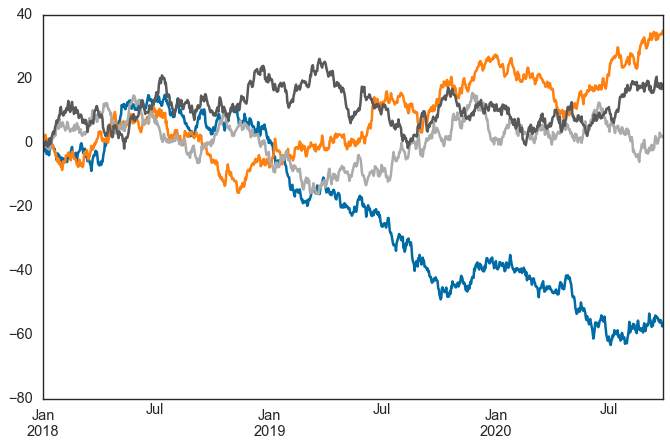

In [520]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
ts = ts.cumsum()
df1 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df1 = df1.cumsum()

df1.plot(figsize=(10,6), legend=False);

### Bar plot

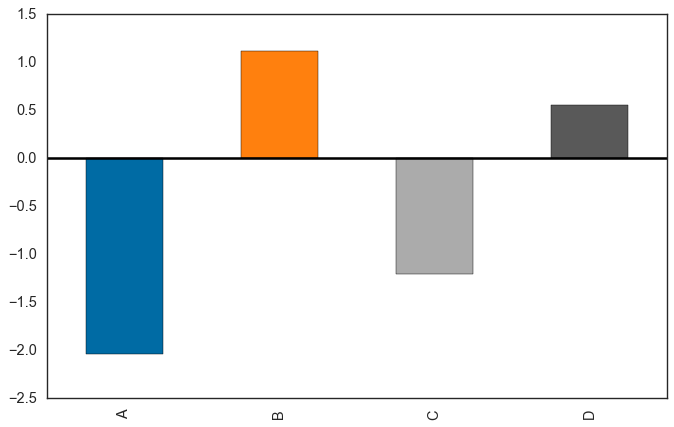

In [521]:
df1.iloc[5].plot.bar(figsize=(10,6)); plt.axhline(0, color='k');

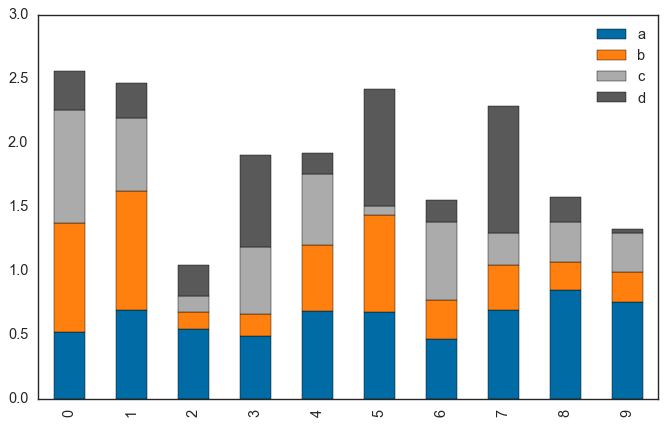

In [522]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar(stacked=True, figsize=(10,6));

### Histogram

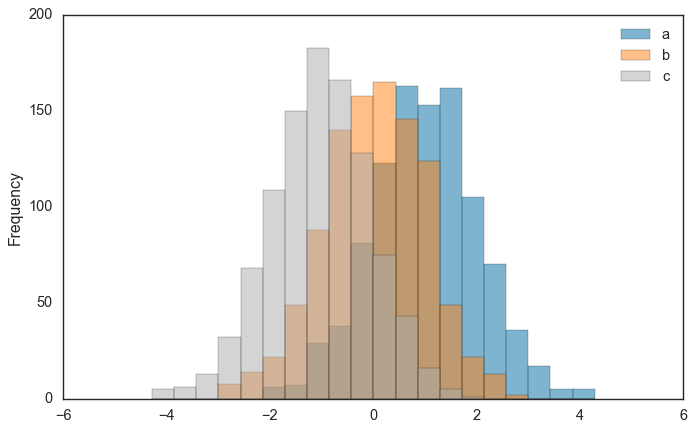

In [523]:
df3 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000), 
                    'c': np.random.randn(1000) - 1}, 
                   columns=['a', 'b', 'c'])

df3.plot.hist(alpha=0.5, bins=20, figsize=(10,6));

### Scatter plot

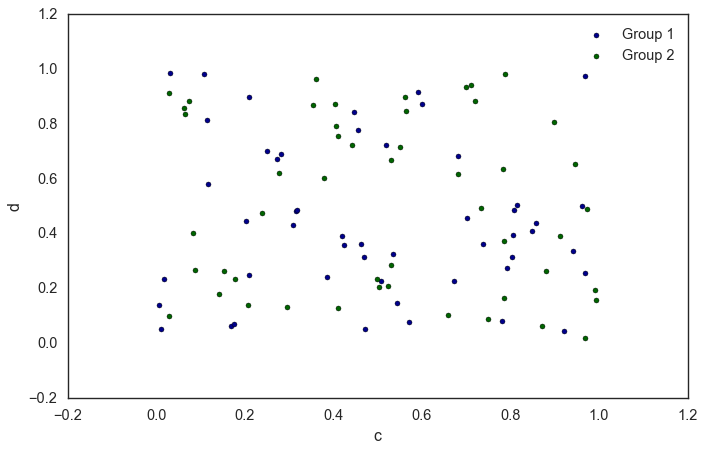

In [524]:
df4 = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

ax = df4.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1', figsize=(10,6));
df4.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

### Plot with Seaborn

In [525]:
import seaborn as sns

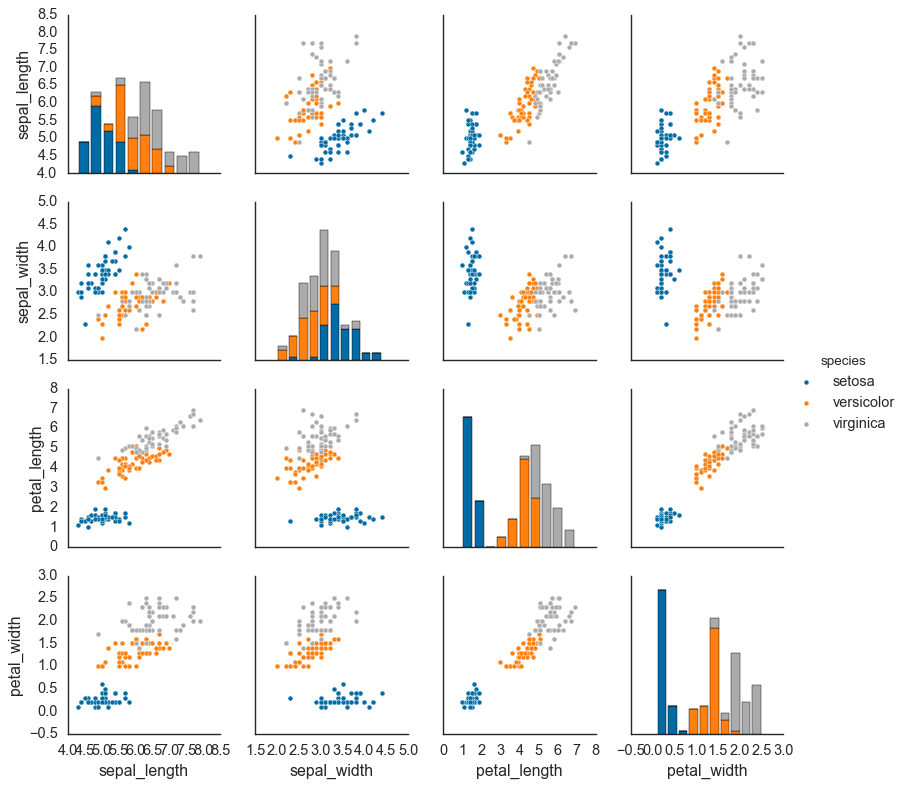

In [526]:
iris = sns.load_dataset("iris")

sns.pairplot(iris, hue='species', size=2.5);

## Writing CSV File

In [481]:
# re-read data into a DataFrame to ensure we have clean data to write into CSV, JSON, and Excel files
df = pd.read_csv(CSV_IN_FILE)

# select rows where gender equals male so these output files are different than the ones from Python Basics
males = df.loc[df.gender == 'male',:]
males

,gender,name.title,name.first,name.last,location.street,location.city,location.state,location.postcode,email,login.username,...,dob,registered,phone,cell,id.name,id.value,picture.large,picture.medium,picture.thumbnail,nat
2,male,mr,daniel,mcdonalid,5071 miller ave,spokane,west virginia,72244,daniel.mcdonalid@example.com,purplefrog645,...,1950-04-16 19:37:36,2010-01-14 18:21:00,(017)-074-5612,(073)-800-4129,SSN,203-49-0187,https://randomuser.me/api/portraits/men/73.jpg,https://randomuser.me/api/portraits/med/men/73...,https://randomuser.me/api/portraits/thumb/men/...,US
3,male,mr,joseph,mccoy,4529 w dallas st,irvine,tennessee,27143,joseph.mccoy@example.com,whitelion627,...,1946-02-14 17:33:17,2006-03-29 22:23:53,(127)-001-9598,(693)-872-6786,SSN,419-71-1884,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,US
4,male,mr,erik,castro,7027 crockett st,oakland,indiana,69877,erik.castro@example.com,whitepeacock129,...,1947-02-16 21:39:33,2008-06-01 13:34:11,(934)-158-3960,(622)-681-7490,SSN,691-33-4461,https://randomuser.me/api/portraits/men/61.jpg,https://randomuser.me/api/portraits/med/men/61...,https://randomuser.me/api/portraits/thumb/men/...,US
5,male,mr,ralph,cox,6812 wycliff ave,killeen,iowa,43638,ralph.cox@example.com,blueostrich503,...,1952-11-04 11:59:48,2010-12-27 07:42:01,(836)-068-1416,(857)-990-6689,SSN,078-60-2192,https://randomuser.me/api/portraits/men/76.jpg,https://randomuser.me/api/portraits/med/men/76...,https://randomuser.me/api/portraits/thumb/men/...,US
8,male,mr,brian,daniels,9688 spring st,clarksville,iowa,97882,brian.daniels@example.com,whitetiger246,...,1954-07-15 13:43:53,2005-05-31 22:23:21,(585)-749-2148,(107)-333-0135,SSN,392-84-0363,https://randomuser.me/api/portraits/men/22.jpg,https://randomuser.me/api/portraits/med/men/22...,https://randomuser.me/api/portraits/thumb/men/...,US
11,male,mr,reginald,fernandez,2786 walnut hill ln,shelby,tennessee,95433,reginald.fernandez@example.com,silvermouse547,...,1952-03-07 15:48:43,2007-10-01 19:57:41,(749)-439-2650,(769)-723-6492,SSN,826-12-0852,https://randomuser.me/api/portraits/men/94.jpg,https://randomuser.me/api/portraits/med/men/94...,https://randomuser.me/api/portraits/thumb/men/...,US
16,male,mr,mitchell,moore,1866 e sandy lake rd,wichita falls,indiana,23994,mitchell.moore@example.com,orangepanda667,...,1990-01-06 20:38:29,2007-11-30 02:39:30,(181)-668-9444,(975)-371-5848,SSN,771-04-1806,https://randomuser.me/api/portraits/men/91.jpg,https://randomuser.me/api/portraits/med/men/91...,https://randomuser.me/api/portraits/thumb/men/...,US
18,male,mr,kirk,banks,3330 forest ln,santa ana,new mexico,40528,kirk.banks@example.com,orangebird120,...,1994-08-23 13:59:09,2002-12-19 15:27:40,(721)-396-0358,(744)-336-4560,SSN,712-27-8948,https://randomuser.me/api/portraits/men/66.jpg,https://randomuser.me/api/portraits/med/men/66...,https://randomuser.me/api/portraits/thumb/men/...,US
19,male,mr,alfredo,hernandez,1312 washington ave,college station,north carolina,24881,alfredo.hernandez@example.com,greentiger301,...,1957-05-17 13:56:27,2010-07-08 06:02:47,(510)-289-1460,(574)-263-0757,SSN,701-97-7208,https://randomuser.me/api/portraits/men/12.jpg,https://randomuser.me/api/portraits/med/men/12...,https://randomuser.me/api/portraits/thumb/men/...,US
21,male,mr,travis,garrett,1542 hunters creek dr,dallas,oklahoma,31533,travis.garrett@example.com,silvercat646,...,1967-08-28 12:09:30,2009-10-06 04:17:33,(470)-613-6453,(105)-376-8129,SSN,710-67-2699,https://randomuser.me/api/portraits/men/70.jpg,https://randomuser.me/api/portraits/med/men/70...,https://randomuser.me/api/portraits/thumb/men/...,US


In [482]:
CSV_OUT_FILE = '../outFiles/randomuser5000_males.csv'

In [483]:
males.to_csv(CSV_OUT_FILE, index=False)
print('Finished writing file.')

Finished writing file.


## Writing JSON File

In [484]:
JSON_OUT_FILE = '../outFiles/randomuser5000_males.json'

In [485]:
males.to_json(JSON_OUT_FILE, orient='records')
print('Finished writing file.')

Finished writing file.


## Writing Excel File

In [486]:
EXCEL_OUT_FILE = '../outFiles/randomuser5000_males.xls'

In [487]:
males.to_excel(EXCEL_OUT_FILE, sheet_name='randomuser_males', index=False)
print('Finished writing file.')

Finished writing file.
